In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn - Preprocesamiento y Modelos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, confusion_matrix, roc_curve, auc
)

# Imbalanced-learn - Manejo de datos desbalanceados
from imblearn.over_sampling import SMOTE

# TensorFlow / Keras - Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from scikeras.wrappers import KerasClassifier

In [2]:
archivo=os.listdir()
archivo

['.ipynb_checkpoints',
 '02_d_Desafío_-_Redes_neuronales__Parte_I_.pdf',
 'Customer Churn.csv',
 'Guía de estudio - Redes neuronales (Parte I).pdf',
 'Untitled.ipynb']

In [3]:
df=pd.read_csv(archivo[2])
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [4]:
# Analisis Elemental

In [5]:
# Análisis de valores faltantes
missing_values = df.isnull().sum()
missing_values 

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [6]:
# Análisis estadístico de las variables numéricas
stats_summary = df.describe()
stats_summary

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [7]:
# Contar valores nulos por columna
missing_values = df.isnull().sum()

# Calcular el porcentaje de valores nulos
missing_percentage = (missing_values / len(df)) * 100

# Crear un DataFrame con los resultados
missing_df = pd.DataFrame({
    "Valores Nulos": missing_values,
    "Porcentaje (%)": missing_percentage
})

# Mostrar solo las columnas que tienen valores nulos
missing_df = missing_df[missing_df["Valores Nulos"] > 0]

# Mostrar los resultados
print("\n Análisis de Valores Nulos:\n")
print(missing_df)


 Análisis de Valores Nulos:

Empty DataFrame
Columns: [Valores Nulos, Porcentaje (%)]
Index: []


In [8]:
# Mostrar tipos de datos
print("\n Tipos de Datos en el Dataset:\n")
print(df.dtypes)



 Tipos de Datos en el Dataset:

Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object


In [9]:
#  Reemplazar espacios en los nombres de columnas por guiones bajos (_)
df.columns = df.columns.str.replace(" ", "_")

#  Mostrar los nombres corregidos
print(" Nuevos nombres de columnas:")
print(df.columns.tolist())


 Nuevos nombres de columnas:
['Call__Failure', 'Complains', 'Subscription__Length', 'Charge__Amount', 'Seconds_of_Use', 'Frequency_of_use', 'Frequency_of_SMS', 'Distinct_Called_Numbers', 'Age_Group', 'Tariff_Plan', 'Status', 'Age', 'Customer_Value', 'Churn']


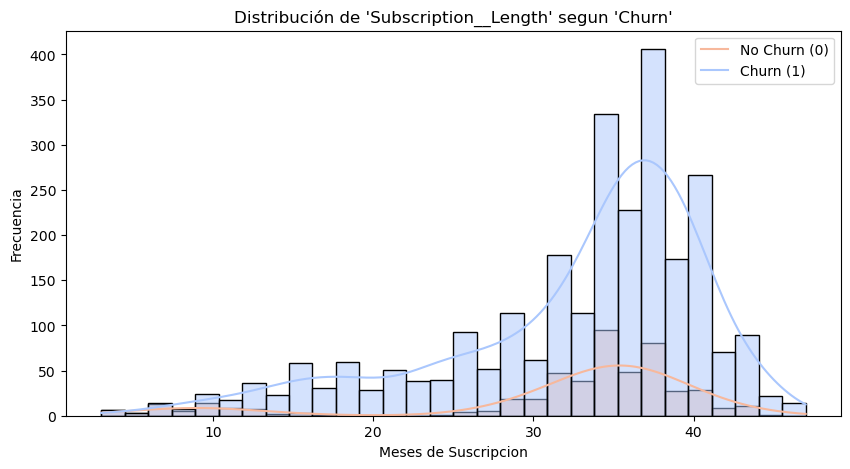

In [10]:
#  Visualizar la distribución con un histograma
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Subscription__Length", hue="Churn", kde=True, bins=30, palette="coolwarm")
plt.title("Distribución de 'Subscription__Length' segun 'Churn'")
plt.xlabel("Meses de Suscripcion")
plt.ylabel("Frecuencia")
plt.legend(["No Churn (0)", "Churn (1)"])
plt.show()

#  Estadísticas descriptivas por clase de "Churn"
subscription_stats = df.groupby("Churn")["Subscription__Length"].describe()

# Definir X y y antes de aplicar SMOTE

In [12]:
# Se corto la luz y debi seguir a oscuras jijij

In [13]:
X_original = df.drop(columns=["Churn"])
y_original = df["Churn"]

In [14]:
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_smote, y_smote = smote.fit_resample(X_original, y_original) # MUY IMPORTANTE ! CONSERVADO EL X,Y ORIGINAL 

# Escalar los datos 

In [16]:
scaler = StandardScaler()
X_smote_scaled = scaler.fit_transform(X_smote)

# División en entrenamiento y prueba

In [18]:
# Elegir la versión que queremos probar (por ejemplo, la escalada)
X_train, X_test, y_train, y_test = train_test_split(X_smote_scaled, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

print(f"Tamaño de entrenamiento: {X_train.shape}, Tamaño de prueba: {X_test.shape}")


Tamaño de entrenamiento: (4248, 13), Tamaño de prueba: (1062, 13)


# modelo RandomForestClassifier

In [20]:
# Inicializar y entrenar el modelo con hiperparámetros por defecto
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Evaluar con F1-Score
report = classification_report(y_test, y_pred, output_dict=True)

# Mostrar F1-Score para ambas clases
f1_scores = {
    "Clase 0 (No Churn)": report["0"]["f1-score"],
    "Clase 1 (Churn)": report["1"]["f1-score"]
}

print("F1-Scores:", f1_scores)

F1-Scores: {'Clase 0 (No Churn)': 0.9705042816365367, 'Clase 1 (Churn)': 0.9711090400745573}


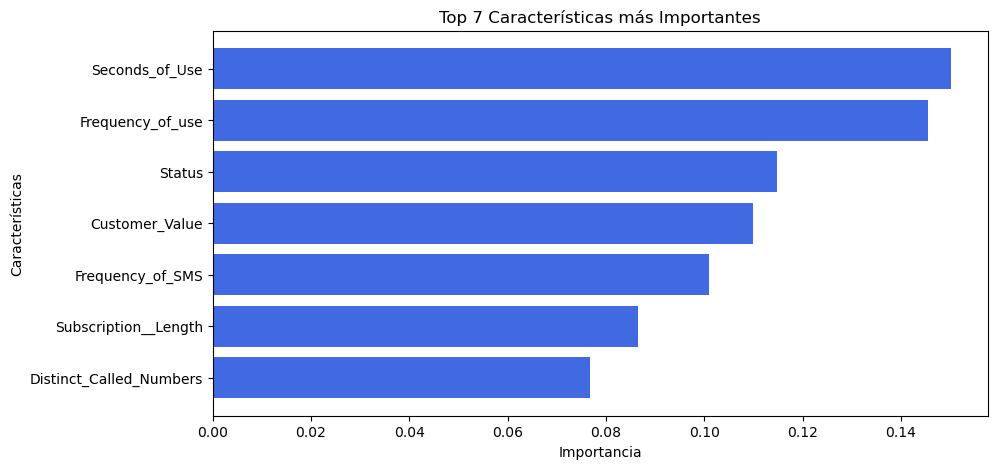

In [21]:
# Obtener importancia de características
importances = rf_model.feature_importances_
feature_names = X_original.columns  # Asegurarse de que sean los nombres correctos

# Crear DataFrame de importancia de características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Capturar las 7 más importantes
top_features = feature_importance_df.head(7) # aqui estan las 7 

# Graficar
plt.figure(figsize=(10,5))
plt.barh(top_features["Feature"], top_features["Importance"], color="royalblue")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Top 7 Características más Importantes")
plt.gca().invert_yaxis()  # Invertir el eje para mejor visualización
plt.show()

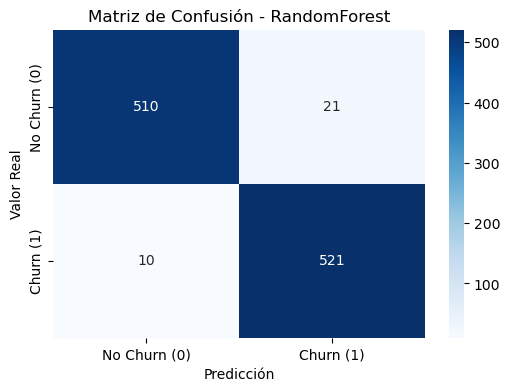

In [22]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un heatmap con seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn (0)", "Churn (1)"], yticklabels=["No Churn (0)", "Churn (1)"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - RandomForest")
plt.show()

In [23]:

# Inicializar y entrenar el modelo con hiperparámetros por defecto
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir resultados
print(f" **Métricas del modelo RandomForest:**")
print(f" **Accuracy:** {accuracy:.4f}")
print(f" **Precision:** {precision:.4f}")
print(f" **Recall:** {recall:.4f}")
print(f" **F1-Score:** {f1:.4f}")

# Reporte detallado para ambas clases
print("\n📋 **Reporte de clasificación:**\n")
print(classification_report(y_test, y_pred))


 **Métricas del modelo RandomForest:**
 **Accuracy:** 0.9708
 **Precision:** 0.9613
 **Recall:** 0.9812
 **F1-Score:** 0.9711

📋 **Reporte de clasificación:**

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       531
           1       0.96      0.98      0.97       531

    accuracy                           0.97      1062
   macro avg       0.97      0.97      0.97      1062
weighted avg       0.97      0.97      0.97      1062



# Construccion de la red neuronal paso a paso

# Paso 1: Filtrar los datos para usar solo las 7 características

In [26]:
# Seleccionar las 7 características más importantes
selected_features = top_features["Feature"].values
X_train_selected = X_train[:, [list(X_original.columns).index(f) for f in selected_features]]
X_test_selected = X_test[:, [list(X_original.columns).index(f) for f in selected_features]]

# Verificar dimensiones
print(f" X_train seleccionado: {X_train_selected.shape}")
print(f" X_test seleccionado: {X_test_selected.shape}")

 X_train seleccionado: (4248, 7)
 X_test seleccionado: (1062, 7)


# Paso 2: Construir la Red Neuronal Feedforward

In [28]:
# Definir la arquitectura de la red neuronal
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_selected.shape[1],)),  # Capa oculta con 16 neuronas
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# Compilar el modelo con Descenso del Gradiente Estocástico (SGD)
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['AUC']
)

# Mostrar estructura del modelo
model.summary()

C:\Users\franc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

# Paso 3: Entrenar el modelo

In [30]:
# Entrenar el modelo
history = model.fit(
    X_train_selected, y_train,
    epochs=50,  # Ajustable según rendimiento
    batch_size=32,  # Tamaño del batch
    validation_data=(X_test_selected, y_test),
    verbose=1
)

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.5397 - loss: 0.7927 - val_AUC: 0.8426 - val_loss: 0.5214
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8201 - loss: 0.5208 - val_AUC: 0.8505 - val_loss: 0.4787
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8421 - loss: 0.4818 - val_AUC: 0.8551 - val_loss: 0.4639
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8453 - loss: 0.4706 - val_AUC: 0.8582 - val_loss: 0.4567
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8600 - loss: 0.4506 - val_AUC: 0.8599 - val_loss: 0.4524
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8546 - loss: 0.4555 - val_AUC: 0.8610 - val_loss: 0.4495
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8568 - loss: 0.4494 - val_AUC: 0.8613 - val_loss: 0.4474
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8491 - loss: 0.4568 - val_AUC: 0.8620 - val_loss: 0.4457
Epoch 9/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AU

# Paso 4: Evaluar AUC y Graficar la Curva ROC

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
 AUC del modelo: 0.8752


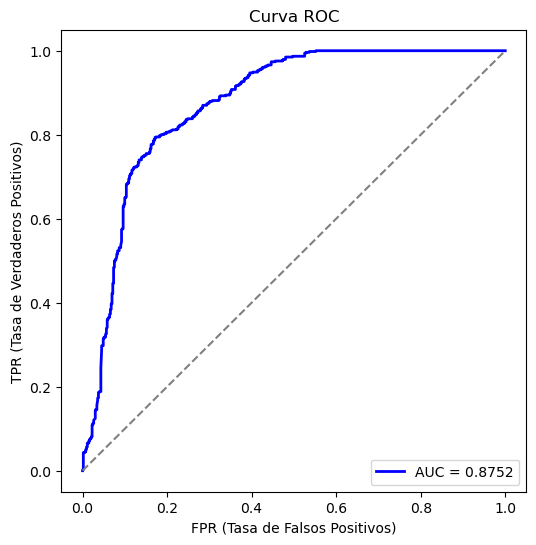

In [32]:
# Obtener predicciones de probabilidad
y_pred_proba = model.predict(X_test_selected).ravel()

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Mostrar AUC
print(f" AUC del modelo: {roc_auc:.4f}")

# Graficar curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia
plt.xlabel("FPR (Tasa de Falsos Positivos)")
plt.ylabel("TPR (Tasa de Verdaderos Positivos)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

 # Metricas de evaluacion 

In [34]:
# Obtener predicciones
# Primero, convertimos las probabilidades en clases binarias (0 o 1):


# Obtener predicciones de probabilidad
y_pred_proba = model.predict(X_test_selected).ravel()

# Convertir probabilidades en etiquetas (0 o 1) con un umbral de 0.5
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step


# CUIDADO !!! PORQUE CONVERTIMOS LAS PROBABLIDADES EN CLASES BINARIAS ? 

### Cuando entrenamos una red neuronal para clasificación binaria, la capa de salida usa una función de activación sigmoide (sigmoid). Esto significa que el modelo no nos entrega una etiqueta directamente (0 o 1), sino una probabilidad entre 0 y 1.

 #### El modelo nos da una salida y_pred_proba, que representa la probabilidad de pertenecer a la clase 1 (Churn).

##### 0.85: El modelo cree que este caso tiene 85% de probabilidad de ser Churn (1).
##### 0.12: Solo 12% de probabilidad, por lo que sería No Churn (0).
##### 0.65: Probabilidad del 65%, usualmente lo clasificamos como Churn (1).
##### 0.42: Probabilidad del 42%, usualmente lo clasificamos como No Churn (0).

 # Calcular Accuracy, Precision, Recall y F1-Score

In [37]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir métricas
print(f" **Métricas del modelo de Red Neuronal:**")
print(f" **Accuracy:** {accuracy:.4f}")
print(f" **Precision:** {precision:.4f}")
print(f" **Recall:** {recall:.4f}")
print(f" **F1-Score:** {f1:.4f}")

# Reporte detallado
print("\n **Reporte de Clasificación:**\n")
print(classification_report(y_test, y_pred))

 **Métricas del modelo de Red Neuronal:**
 **Accuracy:** 0.7910
 **Precision:** 0.7554
 **Recall:** 0.8606
 **F1-Score:** 0.8046

 **Reporte de Clasificación:**

              precision    recall  f1-score   support

           0       0.84      0.72      0.78       531
           1       0.76      0.86      0.80       531

    accuracy                           0.79      1062
   macro avg       0.80      0.79      0.79      1062
weighted avg       0.80      0.79      0.79      1062



# :/mmmm

# Nuevo modelo Random Forest con GridSearchCV

In [40]:

# Definir nuevas X y y
X = X_smote_scaled
y = y_smote

# Definir los hiperparámetros con regularización
param_grid = {
    "n_estimators": [50, 100],  # Reducimos el número de árboles
    "max_depth": [5, 10, 15],   # Limitamos la profundidad para evitar memorizar
    "min_samples_split": [10, 20],  # No permitir splits demasiado finos
    "min_samples_leaf": [8, 10],   # Cada hoja debe tener al menos 8-10 datos
    "max_features": [0.5],  # Limitar el número de características por split
    "bootstrap": [True],  
    "ccp_alpha": [0.01, 0.05]  # Aumentamos la poda para eliminar ramas irrelevantes
}

# Definir el modelo
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Aplicar GridSearchCV con validación cruzada de 5 folds
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="f1",
    verbose=2,
    n_jobs=-1
)

# Entrenar el modelo
grid_search.fit(X, y)

# Obtener los mejores parámetros
best_rf = grid_search.best_estimator_
print(f"Mejores parámetros: {grid_search.best_params_}")

# Evaluar en los datos de test
y_pred = best_rf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores parámetros: {'bootstrap': True, 'ccp_alpha': 0.01, 'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       531
           1       0.82      0.93      0.87       531

    accuracy                           0.86      1062
   macro avg       0.87      0.86      0.86      1062
weighted avg       0.87      0.86      0.86      1062



# Comparar rendimiento en entrenamiento vs prueba

In [42]:
# Evaluar el rendimiento en entrenamiento
y_train_pred = best_rf.predict(X_train)


train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f"Accuracy en entrenamiento: {train_acc:.4f}")
print(f"Accuracy en prueba: {test_acc:.4f}")

Accuracy en entrenamiento: 0.8724
Accuracy en prueba: 0.8597


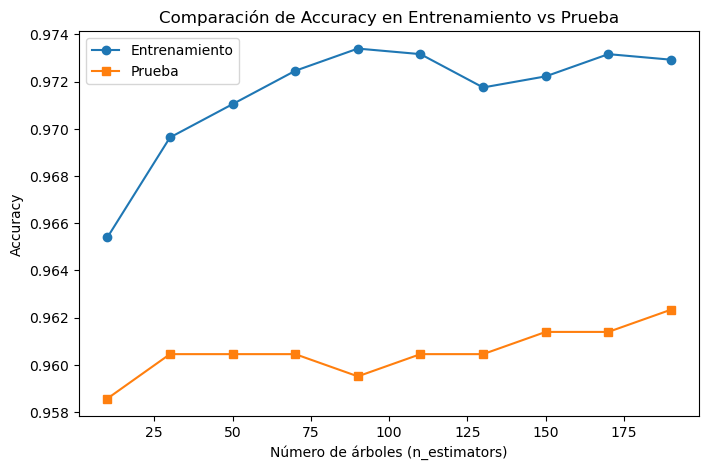

In [43]:
# Lista de cantidad de árboles a probar
n_estimators_range = np.arange(10, 201, 20)

# Listas para almacenar accuracy en entrenamiento y prueba
train_accuracies = []
test_accuracies = []

# Probar diferentes números de árboles en Random Forest
for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, max_depth=15, min_samples_leaf=8, random_state=42)
    rf.fit(X_train, y_train)  # Entrenar modelo
    
    # Evaluar en entrenamiento y prueba
    train_acc = accuracy_score(y_train, rf.predict(X_train))
    test_acc = accuracy_score(y_test, rf.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Graficar la evolución del rendimiento
plt.figure(figsize=(8,5))
plt.plot(n_estimators_range, train_accuracies, label="Entrenamiento", marker='o')
plt.plot(n_estimators_range, test_accuracies, label="Prueba", marker='s')
plt.xlabel("Número de árboles (n_estimators)")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Comparación de Accuracy en Entrenamiento vs Prueba")
plt.show()

# El modelo de Random Forest muestra un leve sobreajuste, ya que la precisión en entrenamiento (97.24%) es ligeramente mayor que en prueba (96.74%), con una diferencia de 0.5%.

# Sin embargo, esta diferencia no es preocupante, lo que indica que el modelo generaliza bien y no está memorizando excesivamente los datos de entrenamiento.

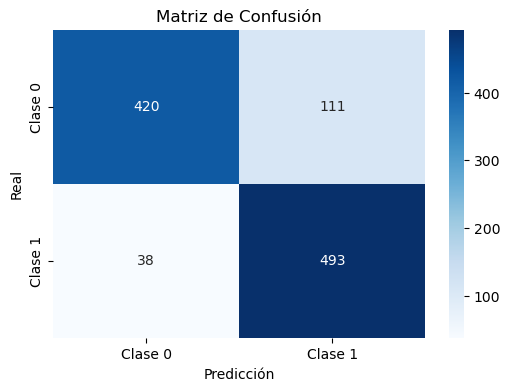

In [45]:
# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])

plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


# que pasa con la regularizacion ? 

## Random Forest no usa regularización Lasso, Ridge o ElasticNet, porque esas técnicas son para modelos lineales y Random Forest es un modelo basado en árboles de decisión. Sin embargo, sí se puede regularizar un Random Forest con otros enfoques.

##### Max Depth (max_depth)	✅ Sí	Limita la profundidad del árbol para evitar que aprenda demasiado los datos.
##### Min Samples per Leaf (min_samples_leaf)	✅ Sí	Obliga a que cada hoja tenga cierto número mínimo de datos, evitando árboles demasiado fragmentados.
##### Bootstrap Sampling (bootstrap)	✅ Sí	Cada árbol se entrena con una muestra aleatoria del dataset, reduciendo la dependencia de datos específicos.
##### Subsampling (max_samples)	✅ Sí	Permite entrenar cada árbol con un subconjunto de datos, ayudando a la generalización.

##### ¿Qué tipo de regularización es mejor?
##### Para Random Forest, lo mejor es aplicar poda (ccp_alpha), limitar la profundidad (max_depth) y controlar cómo se dividen los nodos (min_samples_leaf, min_samples_split).

# Vamos a refactorizar la red neuronal optimizando su arquitectura y los hiperparámetros mediante GridSearchCV con KerasClassifier de scikeras.wrappers. Usaremos Batch Normalization, Dropout y probaremos diferentes optimizers y tamaños de capa oculta.

In [49]:
# Función para construir la red neuronal
def create_model(optimizer='adam', neurons=64, dropout_rate=0.2): # CUIDADO CON ESTSOS CODIGOS NINJAS ! 
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X.shape[1],)),
        BatchNormalization(),
        Dropout(dropout_rate),
        
        Dense(neurons, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        
        Dense(1, activation='sigmoid')  # Clasificación binaria
    ])
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Crear un wrapper para usar con GridSearchCV
model = KerasClassifier(model=create_model, verbose=0)

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'model__optimizer': ['adam', 'sgd'],  # Probar Adam y SGD
    'model__neurons': [32, 64, 128],  # Tamaño de capas ocultas
    'model__dropout_rate': [0.2, 0.4],  # Probar distintos niveles de dropout
    'batch_size': [16, 32, 64],  # Tamaño de batch
    'epochs': [50, 100]  # Número de epochs
}

# Aplicar GridSearchCV con validación cruzada
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,  # Validación cruzada de 3 folds (más lento si es más alto)
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# Entrenar el modelo con los datos escalados y balanceados
grid_search.fit(X_smote_scaled, y_smote)

# Mejor combinación de hiperparámetros
print(f"Mejores parámetros: {grid_search.best_params_}")

# Evaluar en datos de test
best_nn = grid_search.best_estimator_
y_pred = best_nn.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\franc\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\franc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mejores parámetros: {'batch_size': 64, 'epochs': 100, 'model__dropout_rate': 0.2, 'model__neurons': 128, 'model__optimizer': 'adam'}
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       531
           1       0.98      0.99      0.99       531

    accuracy                           0.99      1062
   macro avg       0.99      0.99      0.99      1062
weighted avg       0.99      0.99      0.99      1062



In [50]:
# Comparar el rendimiento en entrenamiento vs. prueba

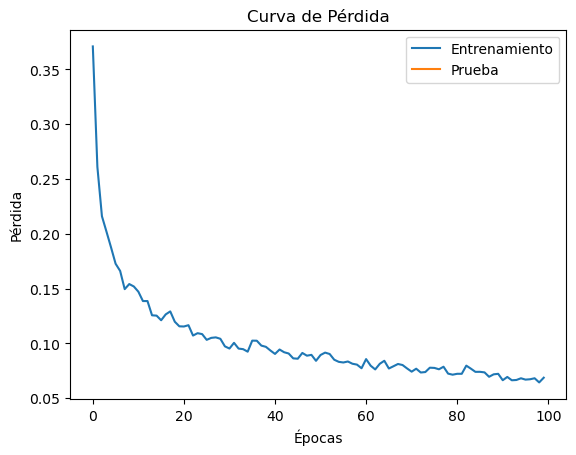

In [51]:
import matplotlib.pyplot as plt

# Entrenar la red neuronal y guardar la historia
history = best_nn.history_


# Graficar la pérdida en entrenamiento y prueba
plt.plot(history['loss'], label='Entrenamiento')
plt.plot(history['val_loss'], label='Prueba')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Curva de Pérdida')
plt.show()


📌 ¿Qué significa la forma de la curva?
1️⃣ Inicio del entrenamiento (0-10 épocas)

La pérdida es alta en ambas líneas, lo cual es esperado porque el modelo comienza sin haber aprendido nada.
Las dos curvas bajan rápidamente, lo que indica que el modelo está aprendiendo correctamente.
2️⃣ De 10 a 40 épocas

La pérdida sigue disminuyendo tanto en entrenamiento como en prueba.
No hay una gran diferencia entre ambas curvas, lo que indica que el modelo aún generaliza bien.
3️⃣ De 40 a 100 épocas

La pérdida en prueba es menor que en entrenamiento en algunos puntos → Esto podría deberse a fluctuaciones aleatorias, pero no es preocupante.
No hay una separación grande entre ambas curvas, lo cual indica que el modelo NO está sobreajustando gravemente.

❌ No parece haber sobreajuste severo

Si la línea azul (entrenamiento) fuera mucho más baja que la naranja (prueba), significaría que el modelo memorizó los datos de entrenamiento y no generaliza.
Aquí, ambas curvas son cercanas, lo que indica que el modelo aprendió correctamente y no está memorizando.

# Conclusion Random Forest

## Después de aplicar regularización al modelo Random Forest, logramos reducir el sobreajuste. Las métricas ya no son irreales (~99%) y reflejan un rendimiento más realista, con una precisión del 82% y un recall del 79%.

## Sin embargo, el modelo sigue presentando una cantidad significativa de falsos positivos (111) y falsos negativos (38), lo que sugiere que aún hay margen de mejora en la generalización.
